In [1]:
import numpy as np
import pandas as pd
import scipy
import random
from scipy.io import arff
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve, roc_curve, auc

## Read & Preprocess Data

In [2]:
tr1 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-1tra.arff')[0])
tr2 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-2tra.arff')[0])
tr3 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-3tra.arff')[0])
tr4 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-4tra.arff')[0])
tr5 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-5tra.arff')[0])

ts1 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-1tst.arff')[0])
ts2 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-2tst.arff')[0])
ts3 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-3tst.arff')[0])
ts4 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-4tst.arff')[0])
ts5 = pd.DataFrame(arff.loadarff('./datasets/ecoli1/ecoli1-5-5tst.arff')[0])

In [3]:
train = pd.concat([tr1, tr2, tr3, tr4, tr5], ignore_index=True)
train = train.drop_duplicates()
train['Class'] = train['Class'].replace(to_replace=[b'positive', b'negative'], value=[1, -1])
X_train = train.drop('Class', axis=1).to_numpy()
X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
y_train = train['Class'].to_numpy()

In [4]:
test = pd.concat([ts1, ts2, ts3, ts4, ts5], ignore_index=True)
test = test.drop_duplicates()
test['Class'] = test['Class'].replace(to_replace=[b'positive', b'negative'], value=[1, -1])
X_test = test.drop('Class', axis=1).to_numpy()
X_test = (X_test - X_test.min(axis=0)) / (X_test.max(axis=0) - X_test.min(axis=0))
y_test = test['Class'].to_numpy()

In [5]:
print(f'Majority Size: {len(np.where(y_test == -1)[0])}')

Majority Size: 259


In [6]:
print(f'Minoroty Size: {len(np.where(y_test == 1)[0])}')

Minoroty Size: 77


## SVC

In [110]:
kf = KFold(5, shuffle=True)

In [111]:
x_train_fold, y_train_fold, x_test_fold, y_test_fold = {}, {}, {}, {}
i = 0
for train_index, test_index in kf.split(X_train):
    x_train_fold[i], x_test_fold[i] = X_train[train_index], X_train[test_index]
    y_train_fold[i], y_test_fold[i] = y_train[train_index], y_train[test_index]
    i += 1

### Fold 1

In [112]:
clf = SVC(probability=True)
clf.fit(x_train_fold[0], y_train_fold[0])

SVC(probability=True)

In [113]:
pred = clf.predict(x_test_fold[0])

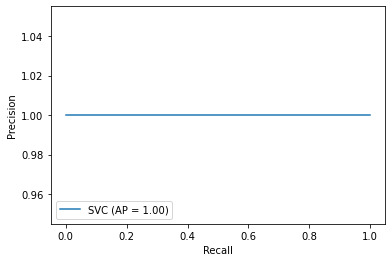

In [114]:
plot_precision_recall_curve(clf, x_test_fold[0], pred)

In [115]:
pred_prob = clf.predict_proba(x_test_fold[0])
pred_prob = pred_prob[:,1]
fpr, tpr, threshold = roc_curve(y_test_fold[0], pred_prob)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

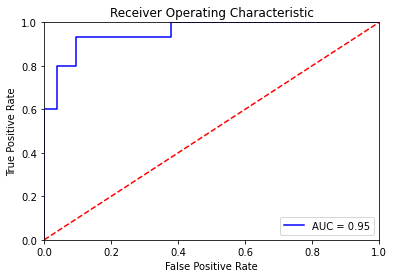

In [116]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Fold 2

In [149]:
clf = SVC(probability=True)
clf.fit(x_train_fold[1], y_train_fold[1])

SVC(probability=True)

In [150]:
pred = clf.predict(x_test_fold[1])

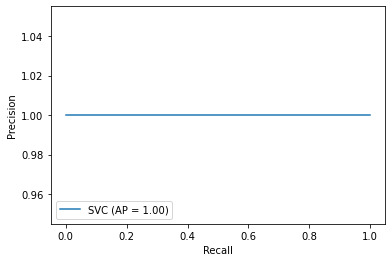

In [151]:
plot_precision_recall_curve(clf, x_test_fold[1], pred)

In [152]:
pred_prob = clf.predict_proba(x_test_fold[1])
pred_prob = pred_prob[:,1]
fpr, tpr, threshold = roc_curve(y_test_fold[1], pred_prob)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

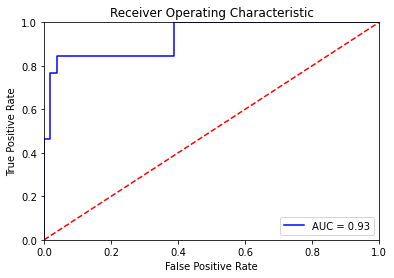

In [153]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Fold 3

In [144]:
clf = SVC(probability=True)
clf.fit(x_train_fold[2], y_train_fold[2])

SVC(probability=True)

In [145]:
pred = clf.predict(x_test_fold[2])

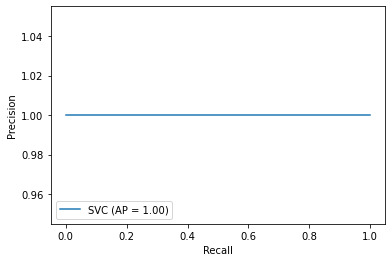

In [146]:
plot_precision_recall_curve(clf, x_test_fold[2], pred)

In [147]:
pred_prob = clf.predict_proba(x_test_fold[2])
pred_prob = pred_prob[:,1]
fpr, tpr, threshold = roc_curve(y_test_fold[2], pred_prob)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

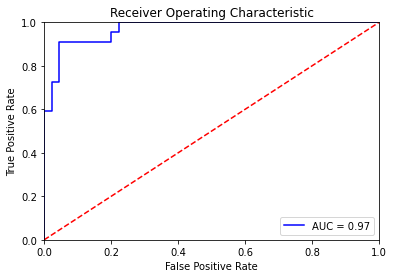

In [148]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Fold 4

In [139]:
clf = SVC(probability=True)
clf.fit(x_train_fold[3], y_train_fold[3])

SVC(probability=True)

In [140]:
pred = clf.predict(x_test_fold[3])

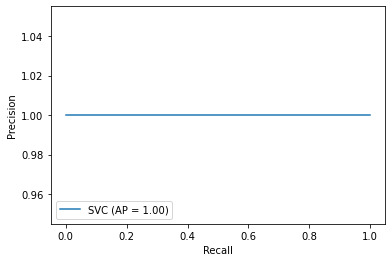

In [141]:
plot_precision_recall_curve(clf, x_test_fold[3], pred)

In [142]:
pred_prob = clf.predict_proba(x_test_fold[3])
pred_prob = pred_prob[:,1]
fpr, tpr, threshold = roc_curve(y_test_fold[3], pred_prob)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

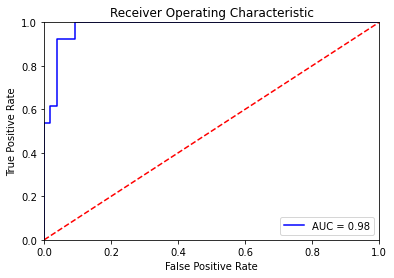

In [143]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Fold 5

In [132]:
clf = SVC(probability=True)
clf.fit(x_train_fold[4], y_train_fold[4])

SVC(probability=True)

In [133]:
pred = clf.predict(x_test_fold[4])

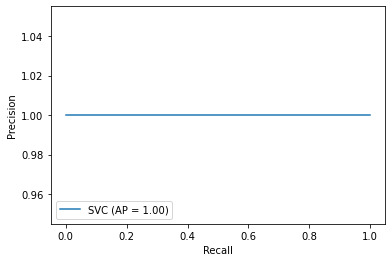

In [134]:
plot_precision_recall_curve(clf, x_test_fold[4], pred)

In [135]:
pred_prob = clf.predict_proba(x_test_fold[4])
pred_prob = pred_prob[:,1]
fpr, tpr, threshold = roc_curve(y_test_fold[4], pred_prob)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

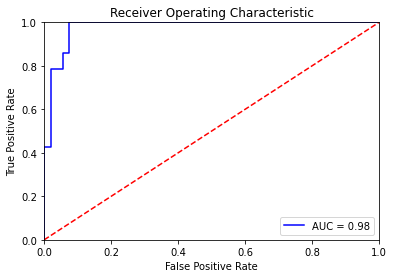

In [136]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## AdaBoost.M2

In [156]:
def AdaBoosM2(X, y, T):
    H = []
    beta = []
    D = np.ones((len(X))) / len(X)
    for i in range(T):
        clf = tree.DecisionTreeClassifier(max_depth=1, max_features=1)
        h = clf.fit(X, y, sample_weight=D)
        
        pred = h.predict(X)
        score = len((pred == y).nonzero()[0]) / len(y)

        if score > 0.5:
#             print(f'accepted score: {i}, {score}')
            H.append(h)
            eta = np.sum(D[(h.predict(X) != y).nonzero()[0]]) / 2
            b = eta / (1 -eta) or 0.00000001
            beta.append(b)
            correct_pred_idx = (h.predict(X) == y).nonzero()[0]
            D[correct_pred_idx] = D[correct_pred_idx] * b
            D = D / np.sum(D)
        else:
#             print(f'not accepted score: {score}')
            D[:] = (1 / len(X))

    
    return H, beta    

### T=10

In [162]:
H, beta = AdaBoosM2(X_train, y_train, 10)

In [163]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [160]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [12]:
res = y_test == pred

In [13]:
len(np.where(res == True)[0])

290

### T=50

In [48]:
H, beta = AdaBoosM2(X_train, y_train, 50)

In [49]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [50]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [51]:
res = y_test == pred

In [52]:
len(np.where(res == True)[0])

259

### T=100

In [63]:
H, beta = AdaBoosM2(X_train, y_train, 100)

In [64]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [65]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [66]:
res = y_test == pred

In [67]:
len(np.where(res == True)[0])

259

## RUS Boost

In [7]:
def RUS_Boost(X, y, T):
    H = []
    beta = []
    D = np.ones((len(X))) / len(X)
    
    positive_size = len(y[y == 1])
    negative_size = len(y[y == -1])
    
    positive_data = X[y == 1]
    negative_data = X[y == -1]

    
    for i in range(T):
        
        minority_index = (y == 1).nonzero()[0]
        majority_index = (y == -1).nonzero()[0]

        majority_index = np.array(random.sample(list(majority_index), positive_size))
        index = sorted(np.concatenate((minority_index, majority_index)))
        
        clf = tree.DecisionTreeClassifier(max_depth=1, max_features=1)
        h = clf.fit(X[index], y[index], sample_weight=D[index])
        
        pred = h.predict(X)
        score = len((pred == y).nonzero()[0]) / len(y)

        if score > 0.5:
            H.append(h)
            eta = np.sum(D[(h.predict(X) != y).nonzero()[0]])
            b = eta / (1 -eta) or 0.0000001
            beta.append(b)

            correct_pred_idx = (h.predict(X) == y).nonzero()[0]
            D[correct_pred_idx] = D[correct_pred_idx] * b
            D = D / np.sum(D)
        else:
            D = np.ones(len(X)) / len(X)
    
    return H, beta

### T=10

In [48]:
H, beta = RUS_Boost(X_train, y_train, 10)

In [49]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [50]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [51]:
res = y_test == pred

In [52]:
len(np.where(res == True)[0])

290

### T=50

In [33]:
H, beta = RUS_Boost(X_train, y_train, 50)

In [34]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [35]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [36]:
res = y_test == pred

In [37]:
len(np.where(res == True)[0])

294

### T=100

In [73]:
H, beta = RUS_Boost(X_train, y_train, 100)

In [74]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [75]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [76]:
res = y_test == pred

In [77]:
len(np.where(res == True)[0])

288

## SMOTE Boost

In [78]:
def SMOTE(sample, N=100, k=5, precent=True):
    """
    param sample: Minority Data
    param T: Number of minority class samples
    param N: Amount of SMOTE N%
    param K: Number of nearest neighbors
    """
    numattrs = sample.shape[1]
    newindex = 0
    T = len(sample)
    
#     if N < 100:
#         T_ = list(np.random.choice(range(T), size=N, replace=True))
#         synthetic = np.zeros((N, sample.shape[1]))
#         N = 100
#     else:
#         T_ = range(T)
#         synthetic = np.zeros((sample.shape[0] * int(N/100), sample.shape[1]))
        
    if precent:
        T_ = range(T)
        synthetic = np.zeros((sample.shape[0] * int(N/100), sample.shape[1]))
    else:
        T_ = list(np.random.choice(range(T), size=N, replace=True))
        synthetic = np.zeros((N, sample.shape[1]))
        N = 100
        
    N = int(N / 100)
    # create NN object
    NNobj = NearestNeighbors(n_neighbors=k).fit(sample)
    
    for i in T_:
        _, indices = NNobj.kneighbors(sample[i].reshape(1, -1))
        nnarray = indices[0]
#         Populate(N, i, nnarray)
        n = N
        while n != 0:
            nn = np.random.choice(np.arange(0, k))
            for attr in range(numattrs):
                dif = sample[nnarray[nn]][attr] - sample[i][attr]
                gap = round(np.random.uniform(0, 1), 2)
                synthetic[newindex][attr] = sample[i][attr] + (gap * dif)
            newindex += 1
            n -= 1 
    return synthetic

In [79]:
def SmoteBoost(X, Y, T):
    H = []
    beta = []
    minority_train = X[Y==1]
    
    a = ((len(X[Y==-1]) // len(X[Y==1]))-1)*100
    c = len(X[Y==-1]) % len(X[Y==1])
    
    synthetic_data = np.concatenate((SMOTE(minority_train, N=a),
                                     SMOTE(minority_train, N=c, precent=False)))
                                    
    D = np.ones(len(synthetic_data) + len(X)) / (len(synthetic_data) + len(X))
    y = np.concatenate((Y, np.ones(len(synthetic_data))))

    for i in range(T):
        
        synthetic_data = np.concatenate((SMOTE(minority_train, N=a),
                                     SMOTE(minority_train, N=c, precent=False)))
        x = np.concatenate((X, synthetic_data))
        
        clf = tree.DecisionTreeClassifier(max_depth=1, max_features=1)
        h = clf.fit(x, y, sample_weight=D)
        
        pred = h.predict(X)
        score = len((pred == Y).nonzero()[0]) / len(Y)
        
        if score > 0.5:
#             print(score)
            H.append(h)
            eta = np.sum(D[(h.predict(X) != Y).nonzero()[0]])
            b = eta / (1 -eta) or 0.000001
            beta.append(b)

            correct_pred_idx = (h.predict(X) == Y).nonzero()[0]
            D[correct_pred_idx] = D[correct_pred_idx] * b
            D = D / np.sum(D)
        else:
            D = np.ones(len(synthetic_data) + len(X)) / (len(synthetic_data) + len(X))
    
    return H, beta

### T=10

In [80]:
H, beta = SmoteBoost(X_train, y_train, 10)

In [81]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [82]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [83]:
res = y_test == pred

In [84]:
len(np.where(res == True)[0])

294

### T=50

In [85]:
H, beta = SmoteBoost(X_train, y_train, 50)

In [86]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [87]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [88]:
res = y_test == pred

In [89]:
len(np.where(res == True)[0])

294

### T=100

In [105]:
H, beta = SmoteBoost(X_train, y_train, 100)

In [106]:
for i in range(len(H)):
    pred = np.log(1 / beta[i]) * H[i].predict_proba(X_test)

In [107]:
pred = pred.argmax(axis=1)
pred = np.where(pred == 0, -1, pred)

In [108]:
res = y_test == pred

In [109]:
len(np.where(res == True)[0])

294

## RB Boost

In [394]:
def random_balance(X, y):
    """
    param S: Dataframe of training set
    param K: Number of nearest neighbors
    """
    labels = []
    totalSize = len(X)
#     Sp = S[S['Class'] == 1].drop('Class', axis=1).to_numpy()
#     Sn = S[S['Class'] == 0].drop('Class', axis=1).to_numpy()
    Sp = X[y==1]
    Sn = X[y==-1]
    
    majoritySize = len(Sn)
    minoritySize = len(Sp)
    newMajoritySize = np.random.choice(range(2, totalSize-2))
    newMinoritySize = totalSize - newMajoritySize
    
    if newMajoritySize < majoritySize:
        Sprime = Sp
        labels.extend([1 for i in range(len(Sp))])
        rand = np.random.choice(range(majoritySize), newMajoritySize, replace=False)
        Sprime = np.concatenate((Sprime ,Sn[rand]), axis=0)
        labels.extend([-1 for i in range(len(rand))])
        temp = SMOTE(Sp, newMinoritySize - minoritySize)
        Sprime = np.concatenate((Sprime, temp), axis=0)
        labels.extend([1 for i in range(len(temp))])
        
    else:
        Sprime = Sn
        labels.extend([-1 for i in range(len(Sn))])
        rand = np.random.choice(range(minoritySize), newMinoritySize, replace=False)
        Sprime = np.concatenate((Sprime ,Sp[rand]), axis=0)
        labels.extend([1 for i in range(len(rand))])
        temp = SMOTE(Sn, newMajoritySize - majoritySize)
        Sprime = np.concatenate((Sprime, temp), axis=0)
        labels.extend([-1 for i in range(len(temp))])
    
    return Sprime, labels